In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
import numpy as np
import pandas as pd
import torch
import torch.optim as optim
import sklearn as sk
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
 

Mounted at /content/drive/


Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
"""Create x and y variables"""
df = pd.read_csv("/content/drive/MyDrive/Colabnotes/ncc/arobotthng/data.csv")
"""

x = df.iloc[:,0]
y = df.iloc[:,1]

print(df)
r = ((len(ageglucoseframe.iloc[:-1, 0])*ageglucoseframe.iloc[-1, 2]) - ageglucoseframe.iloc[-1, 0]*ageglucoseframe.iloc[-1, 1]) / \
        np.sqrt((len(ageglucoseframe.iloc[:-1, 0])*ageglucoseframe.iloc[-1, 3] - np.power(ageglucoseframe.iloc[-1, 0], 2)) *  
        (len(ageglucoseframe.iloc[:-1, 0])*ageglucoseframe.iloc[-1, 4]-np.power(ageglucoseframe.iloc[-1, 1], 2)))
print("r value: ", r)"""


'\n\nx = df.iloc[:,0]\ny = df.iloc[:,1]\n\nprint(df)\nr = ((len(ageglucoseframe.iloc[:-1, 0])*ageglucoseframe.iloc[-1, 2]) - ageglucoseframe.iloc[-1, 0]*ageglucoseframe.iloc[-1, 1]) /         np.sqrt((len(ageglucoseframe.iloc[:-1, 0])*ageglucoseframe.iloc[-1, 3] - np.power(ageglucoseframe.iloc[-1, 0], 2)) *  \n        (len(ageglucoseframe.iloc[:-1, 0])*ageglucoseframe.iloc[-1, 4]-np.power(ageglucoseframe.iloc[-1, 1], 2)))\nprint("r value: ", r)'

0      4
1     11
2     55
3     40
4     12
      ..
91    21
92    33
93    75
94    66
95    39
Name: sizeonscreen, Length: 96, dtype: int64
Predicted value:  [ 1.57540483  2.50504032  5.41789819  3.12479731 -0.40781755  4.3643113
 -0.59374465  1.01762353  5.54184959  2.56701602  4.9220926   4.1783842
 -0.03596336  0.83169644  2.25713752 -1.33745304  4.7361655   1.51342913
 -1.15152595 -0.90362315  0.02601234  0.27391514  2.69096742  1.14157493
 -0.09793906]
Coef:  [-0.0619757]
Intercept:  5.727776689861286
MSE score:  5.569066059927869


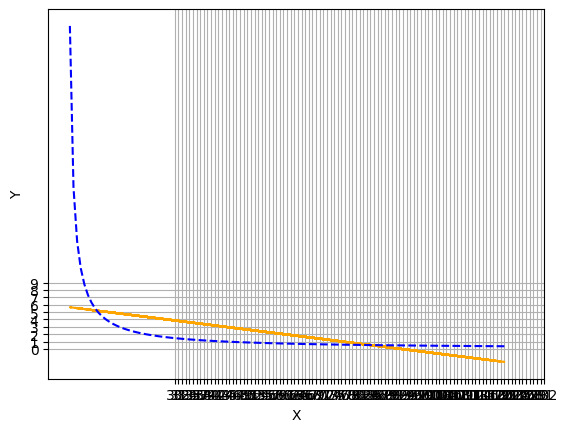

In [ ]:
#plt.plot(df.iloc[0:-1, 0], df.iloc[0:-1, 1], color="Orange", linestyle="None", marker=".", linewidth=3)
lr = LinearRegression()
x = df["sizeonscreen"]
y = df["realdistance"]
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.2)
xtrain.reset_index(drop=True,inplace=True)
xtest.reset_index(drop=True,inplace=True)
ytrain.reset_index(drop=True,inplace=True)
ytest.reset_index(drop=True,inplace=True)
print(xtrain)

lr.fit(xtrain.values.reshape(-1,1),ytrain)
print("Predicted value: ",lr.predict(xtest.values.reshape(-1,1)))
print("Coef: ",lr.coef_) #predict W
print("Intercept: ",lr.intercept_)
y_pred = lr.predict(xtest.values.reshape(-1, 1))
print("MSE score: ", mean_squared_error(ytest, y_pred))
plt.plot(xtrain,lr.predict(xtrain.values.reshape(-1,1)),linestyle='--',color="Orange")
plt.plot(x,y,linestyle='--',color="Blue")
plt.grid()
plt.xticks(np.arange(30, 133))
plt.yticks(np.arange(0, 10))
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.2).copy()
xtrain.reset_index(drop=True,inplace=True)
xtest.reset_index(drop=True,inplace=True)
ytrain.reset_index(drop=True,inplace=True)
ytest.reset_index(drop=True,inplace=True)
# x = pd.Series(df["sizeonscreen"],dtype=np.float32)

xtrain,xtest = tf.Variable(xtrain.to_numpy(),dtype="float32"),tf.Variable(xtest.to_numpy(),dtype="float32")
ytrain,ytest = tf.Variable(ytrain.to_numpy(),dtype="float32"),tf.Variable(ytest.to_numpy(),dtype="float32")


Epoch    0 / 0 W: 0.002 b:0.625 Cost: 1001.113953
Epoch 1000 / 1000 W: -0.002 b:0.882 Cost: 27.808935
Epoch 2000 / 2000 W: -0.005 b:1.127 Cost: 27.095919
Epoch 3000 / 3000 W: -0.008 b:1.360 Cost: 26.443037
Epoch 4000 / 4000 W: -0.011 b:1.581 Cost: 25.844498
Epoch 5000 / 5000 W: -0.013 b:1.792 Cost: 25.294769
Epoch 6000 / 6000 W: -0.016 b:1.992 Cost: 24.789053
Epoch 7000 / 7000 W: -0.018 b:2.182 Cost: 24.324377
Epoch 8000 / 8000 W: -0.020 b:2.363 Cost: 23.898497
Epoch 9000 / 9000 W: -0.022 b:2.534 Cost: 23.505190
Epoch 10000 / 10000 W: -0.024 b:2.698 Cost: 23.141191


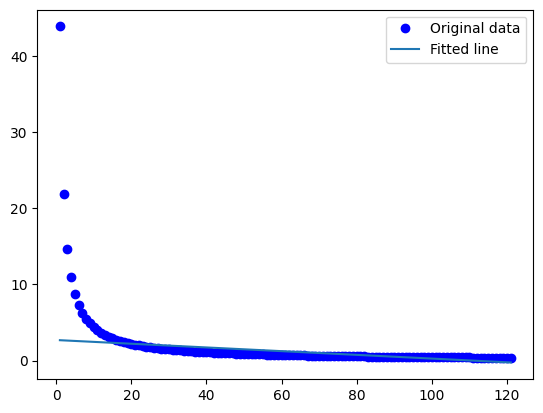

In [ ]:
w = tf.Variable(tf.random_normal([1]),name="Weight")
b = tf.Variable(tf.random_normal([1]),name="bias")

hypothesis = w*xtrain+b
cost = tf.reduce_mean(tf.square(hypothesis-ytrain))

optim = tf.train.GradientDescentOptimizer(learning_rate = 1e-4).minimize(cost)




with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for epoch in range(10001):

    #prediction = tf.argmax(hypothesis,1)
    #correct_pred = tf.equal(prediction,tf.argmax(ytrain,1))
    #accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32))
    _,cost_val,w_val,b_val = sess.run([optim,cost,w,b])
    
    if epoch%1000 == 0:
      prediction = tf.argmax(hypothesis,1)

      correct_pred = tf.equal(prediction,tf.argmax(ytrain,1))
      print('Epoch {:4d} / {} W: {:.3f} b:{:.3f} Cost: {:.6f}'.format(epoch, epoch, w_val.item(), b_val.item(), cost_val))

# Plot the results
plt.plot(df["sizeonscreen"], df["realdistance"], 'bo', label='Original data')
plt.plot(df["sizeonscreen"], w_val.item() * df["sizeonscreen"] + b_val.item(), label='Fitted line')
plt.legend()
plt.show()

Epoch [0/1], Loss: 0.49778929352760315, Accuracy: 17.175003051757812%
MSE score: 81.50442504882812


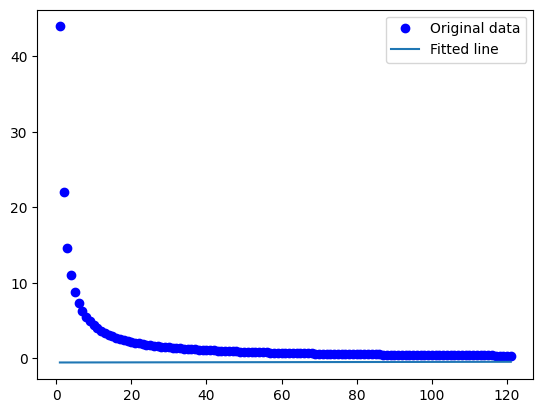

In [ ]:
# Step 1: Import the necessary libraries 
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Step 2: Create a custom dataset class
class DepthPerceptionDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data.iloc[idx, 0], self.data.iloc[idx, 1]

# Step 3: Define a simple linear regression model using PyTorch
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

# Load and preprocess the data
df = pd.read_csv("/content/drive/MyDrive/Colabnotes/ncc/arobotthng/data.csv")
train_data, test_data = train_test_split(df, test_size=0.2)
train_dataset = DepthPerceptionDataset(train_data)
test_dataset = DepthPerceptionDataset(test_data)

train_dataloader = DataLoader(train_dataset, batch_size=1, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=len(test_data), shuffle=False)

# Initialize the model, loss function, and optimizer
model = LinearRegressionModel()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-4)

# Step 5: Train the model
num_epochs = 1
loss_values = []
for epoch in range(num_epochs):
    for x, y in train_dataloader:
        x = x.view(-1, 1).float()
        y = y.view(-1, 1).float()

        optimizer.zero_grad()

        outputs = model(x)
        loss = criterion(outputs, y)
        accuracy = (torch.argmax(outputs,1) - y).float().square().mean()
        loss.backward()
        optimizer.step()

    if epoch % 100 == 0:
        print(f"Epoch [{epoch}/{num_epochs}], Loss: {loss.item()}, Accuracy: {accuracy*100.}%")
        loss_values.append(loss.item())

# Step 6: Evaluate the model
model.eval()
y_pred = []
y_true = []
for x, y in test_dataloader:
    x = x.view(-1, 1).float()
    y = y.view(-1, 1).float()

    with torch.no_grad():
        output = model(x)
        y_pred.extend(output.numpy().flatten())
        y_true.extend(y.numpy().flatten())

mse = np.mean((np.array(y_pred) - np.array(y_true)) ** 2)
print(f"MSE score: {mse}")

# Plot the results
plt.plot(df["sizeonscreen"], df["realdistance"], 'bo', label='Original data')
plt.plot(df["sizeonscreen"], model.linear.weight.item() * df["sizeonscreen"] + model.linear.bias.item(), label='Fitted line')
plt.legend()
plt.show()
